In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/database.csv')
df.sample(10)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
29779,29780,IA07704,Urbandale,Municipal Police,Polk,Iowa,1981,March,1,Murder or Manslaughter,...,Not Hispanic,Male,34,White,Not Hispanic,Acquaintance,Handgun,0.0,0.0,FBI
22529,22530,VA12300,Roanoke,Municipal Police,Roanoke,Virginia,1980,November,2,Murder or Manslaughter,...,Not Hispanic,Unknown,0,Unknown,Unknown,Unknown,Knife,0.0,1.0,FBI
14223,14224,NV00201,Las Vegas Metro,County Police,Clark,Nevada,1980,June,6,Murder or Manslaughter,...,Not Hispanic,Male,33,Black,Not Hispanic,Wife,Handgun,0.0,0.0,FBI
17424,17425,OK00901,El Reno,Municipal Police,Canadian,Oklahoma,1980,June,1,Murder or Manslaughter,...,Not Hispanic,Male,22,Black,Not Hispanic,Friend,Handgun,0.0,0.0,FBI
35389,35390,NC06002,Mecklenburg,Municipal Police,Mecklenburg,North Carolina,1981,April,1,Murder or Manslaughter,...,Not Hispanic,Unknown,0,Unknown,Unknown,Unknown,Unknown,0.0,0.0,FBI
49464,49465,FL01306,Miami,Municipal Police,Dade,Florida,1982,September,5,Murder or Manslaughter,...,Hispanic,Male,45,White,Hispanic,Stranger,Rifle,0.0,1.0,FBI
38509,38510,OH07302,Portsmouth,Municipal Police,Scioto,Ohio,1981,December,1,Murder or Manslaughter,...,Unknown,Male,40,White,Unknown,Acquaintance,Shotgun,0.0,0.0,FBI
12032,12033,MO01500,Camden,Sheriff,Camden,Missouri,1980,August,2,Murder or Manslaughter,...,Hispanic,Male,19,White,Hispanic,Acquaintance,Blunt Object,0.0,0.0,FBI
24591,24592,CA01900,Los Angeles,Sheriff,Los Angeles,California,1981,August,7,Murder or Manslaughter,...,Not Hispanic,Male,24,White,Not Hispanic,Boyfriend/Girlfriend,Strangulation,0.0,0.0,FBI
12294,12295,MOKPD00,Kansas City,Municipal Police,Jackson,Missouri,1980,December,2,Murder or Manslaughter,...,Not Hispanic,Unknown,0,Unknown,Unknown,Unknown,Knife,0.0,1.0,FBI


In [60]:
sortdf = df.sort_values(by=["Perpetrator Age", "Victim Age"])

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
X_train, X_test, y_train, y_test = train_test_split(sortdf['Perpetrator Age'], sortdf['Victim Age'], test_size=0.2,
                                                    random_state=42)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

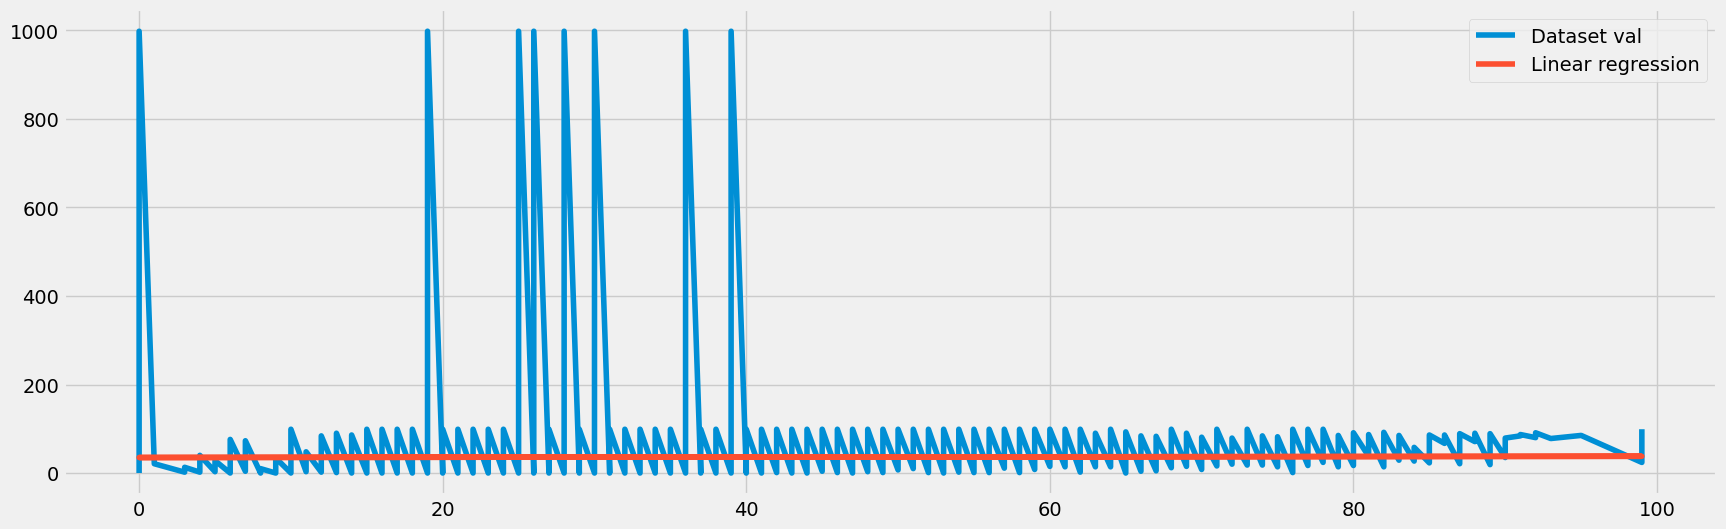

In [63]:
import matplotlib.pyplot as plt
figure, ax = plt.subplots(figsize = (19, 6))
ax.plot(sortdf['Perpetrator Age'], sortdf['Victim Age'], label='Dataset val')
ax.plot(X_train, model.predict(X_train), label='Linear regression')
#ax.plot(X_test, model.predict(X_test), label='Prediction')
ax.legend()
plt.show()

In [64]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("MAE = %s" % mean_absolute_error(model.predict(X_test), y_test))
print('MSE = %s' % mean_squared_error(model.predict(X_test), y_test))

MAE = 14.408288496900088
MSE = 963.5818221438593
